In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/machine.data")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [3]:
print(df.shape)

(208, 10)


In [4]:
df.describe()

,125,256,6000,256.1,16,128,198,199
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


count suggests no missing data

In [19]:

temp =df.drop(["adviser", "32/60"], axis='columns')
temp.corr()

,125,256,6000,256.1,16,128,198,199
125,1.000000,-0.337071,-0.379592,-0.340414,-0.300734,-0.255629,-0.306571,-0.287806
256,-0.337071,1.000000,0.757827,0.602788,0.526665,0.293877,0.798310,0.823113
6000,-0.379592,0.757827,1.000000,0.600680,0.568594,0.562388,0.865576,0.904180
256.1,-0.340414,0.602788,0.600680,1.000000,0.588128,0.423550,0.704642,0.687428
16,-0.300734,0.526665,0.568594,0.588128,1.000000,0.541762,0.608841,0.610094
128,-0.255629,0.293877,0.562388,0.423550,0.541762,1.000000,0.621309,0.606281
198,-0.306571,0.798310,0.865576,0.704642,0.608841,0.621309,1.000000,0.966423
199,-0.287806,0.823113,0.904180,0.687428,0.610094,0.606281,0.966423,1.000000


low correlation between 125 and the other variables 

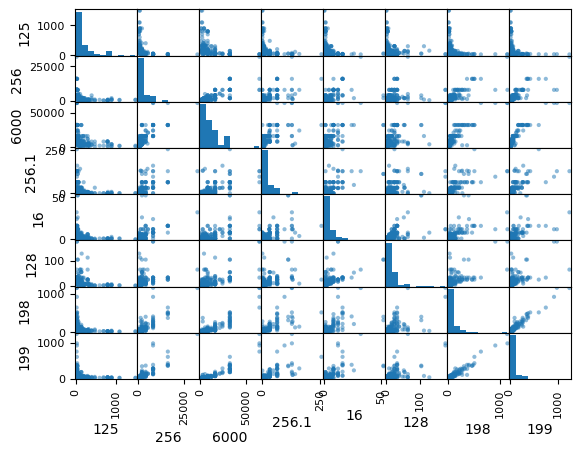

In [21]:
scatter_matrix(df)
plt.savefig('plots/computor1.png')
plt.show()

In [27]:
X = df.drop(['adviser','32/60','199'], axis='columns')
y = df['199']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

print('intercept:', model.intercept_)
print('slopes:', model.coef_)
print('R squared:', model.score(X,y))

intercept: -32.410573316585484
slopes: [ 0.03443313  0.00388484  0.00370053 -0.14183819  0.2572956   0.22162583
  0.64910588]
R squared: 0.9571288178981704


In [29]:

yhat = model.predict(X_test)
print(mean_squared_error(y_test, yhat, squared=False))

36.745556289845


In [30]:
X = df.drop('199', axis='columns')
y = df['199']

X.head()


,adviser,32/60,125,256,6000,256.1,16,128,198
0,amdahl,470v/7,29,8000,32000,32,8,32,269
1,amdahl,470v/7a,29,8000,32000,32,8,32,220
2,amdahl,470v/7b,29,8000,32000,32,8,32,172
3,amdahl,470v/7c,29,8000,16000,32,8,16,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318


In [32]:
print(X.adviser.value_counts())

adviser
ibm             32
nas             19
sperry          13
ncr             13
honeywell       13
siemens         12
amdahl           9
cdc              9
burroughs        8
hp               7
harris           7
dg               7
dec              6
ipl              6
magnuson         6
c.r.d            6
cambex           5
prime            5
formation        5
gould            3
nixdorf          3
perkin-elmer     3
basf             2
bti              2
wang             2
apollo           2
microdata        1
sratus           1
four-phase       1
Name: count, dtype: int64


In [33]:
X = pd.get_dummies(X)
X.head()
X.tail()

,125,256,6000,256.1,16,128,198,adviser_amdahl,adviser_apollo,adviser_basf,...,32/60_v8635,32/60_v8650,32/60_v8655,32/60_v8665,32/60_v8670,32/60_vax:11/730,32/60_vax:11/750,32/60_vax:11/780,32/60_vs-100,32/60_vs-90
203,124,1000,8000,0,1,8,42,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,98,1000,8000,32,2,8,46,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,125,2000,8000,0,2,14,52,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,480,512,8000,32,0,0,67,False,False,False,...,False,False,False,False,False,False,False,False,True,False
207,480,1000,4000,0,0,0,45,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
print('R2 :', model.score(X_train, y_train))

R2 : 1.0


In [35]:
yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

RMSE 36.44448030473619
